# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np

df = pd.read_csv('data/human_body_temperature.csv')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [13]:
df

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
8,98.4,F,84.0
9,98.6,F,86.0


In [4]:
#we can see from df that we have 130 data pts in the test 
df.describe()

,temperature,heart_rate
count,130.000000,130.000000
mean,98.249231,73.761538
std,0.733183,7.062077
min,96.300000,57.000000
25%,97.800000,69.000000
50%,98.300000,74.000000
75%,98.700000,79.000000
max,100.800000,89.000000


### 1. Is the distribution of body temperatures normal?

C:\Users\mabock\AppData\Local\Continuum\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


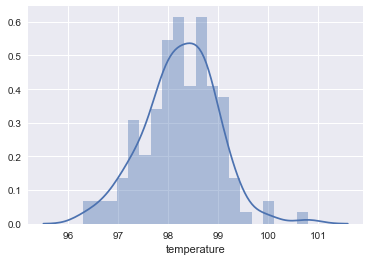

In [32]:
sns.distplot(df.temperature, bins = 20,)

<function matplotlib.pyplot.show>

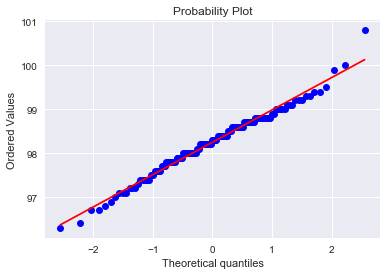

In [49]:
stats.probplot(df['temperature'], dist = 'norm', plot = plt)
plt.show

Both this histogram plot and the probability plot indicate a data set shape that is normally distributed with a small skew.

With 130 data points we can apply a normaltest statistic which returns a chi-squared statistic and p-value given null hypothesis 
that body temperature came from a normal distribution.  We can see p-value is much >0.05 so we cannot reject the null hypothesis 
Therefore we conclude we have a normal distribution.

In [28]:
stats.normaltest(df.temperature)

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)

### 2. Is the sample size large? Are the observations independent?

We have already seen n = 130, which is fairly large, and the observations appear to have no dependance within the dataset.
Therefore the observations are independent.

### 3. Is the true population mean really 98.6 degrees F?
    Would you use a one-sample or two-sample test? Why?
    In this situation, is it appropriate to use the  tt  or  zz  statistic?
    Now try using the other test. How is the result be different? Why?

Because the question asks is the true population mean is 98.6, we are comparing one sample mean to a null hypothesis value and this would be a one-sample test.
The n = 130 is significantly large (n >> 30) and the stdev of temperature is known we would prefer to use a 2-sided Z-test.

Let's test the null hypothesis Ho against the alternate hypotheses Ha using alpha = 0.05

Ho : Body Temperature is 98.6 F

Ha : Body Temperature is not 98.6 F

In [37]:
from statsmodels.stats.weightstats import ztest
print ("Z-test results:", ztest(df.temperature, value = 98.6))

Z-test results: (-5.4548232923645195, 4.9021570141012155e-08)


Because our p-value is very small (~4.9e-8) we would reject the null hypothesis and conclude that avg body temperature is NOT 98.6.  Now we will also check the t-test result.

In [38]:
print ("t-test results:", stats.ttest_1samp(df.temperature, 98.6))

t-test results: Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)


The t-test result p-value is also very small and we would reject the null hypthosis that the avg body temp. is 98.6.  Therefore 
both tests yield the same result.

### 4. At what temperature should we consider someone's temperature to be "abnormal"?
    Start by computing the margin of error and confidence interval.

In [54]:
zscore = 1.96
n = 130
stdev = np.std(df.temperature)
sigma = stdev/np.sqrt(n)
mean = np.mean(df.temperature)
margin = abs(zscore*sigma)

print ('Using a 95% confidence level to define normal we see that anything')
print ('above:', (mean + margin))
print ('below:', (mean - margin))
print ('would be considered abnormal')

Using a 95% confidence level to define normal we see that anything
above: 98.374781734
below: 98.1236798044
would be considered abnormal


### 5. Is there a significant difference between males and females in normal temperature?
    What test did you use and why?
    Write a story with your conclusion in the context of the original problem.

We will complete this question by separating the male and female groups and performing a 2-sample t-test.

Let's test the null hypothesis  Ho  against the alternate hypotheses  Ha  using alpha = 0.05

Ho  : Male and Female are not significantly different normal body temperatures.

Ha  : Male and Female have different normal body temperatures.

In [57]:
t_test = stats.ttest_ind(df.temperature[df.gender == 'M'],df.temperature[df.gender == 'F'])
t_test

Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)

The p-value of ~0.024 is slightly less than our 2-sided requirement of 2.5% in either direction.  Therefore, we would reject the null hypothesis Ho and conclude male and female DO have different normal body temperature.  However, the number is very close to our cutoff of 2.5%.